<a href="https://colab.research.google.com/github/vaikunthcreates/TimeSeries/blob/main/Multivariate_NYC_Energy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Link to video explaining the code - https://www.youtube.com/watch?v=XZhPO043lqU

In [ ]:
!pip install pyyaml==5.4.1
!pip install pycaret
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')
df['timeStamp']=pd.to_datetime(df['timeStamp'])
df.dropna(subset=['demand'],inplace=True)
df['precip'].interpolate(method='linear', inplace=True)
df['temp'].interpolate(method='linear', inplace=True)
df.set_index('timeStamp',inplace=True)
data=df
data['day'] = [i.day for i in data.index]
data['day_name'] = [i.day_name() for i in data.index]
data['day_of_year'] = [i.dayofyear for i in data.index]
data['week_of_year'] = [i.weekofyear for i in data.index]
data['hour'] = [i.hour for i in data.index]
data['is_weekday'] = [i.isoweekday() for i in data.index]

     |████████████████████████████████| 636 kB 16.0 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
     |████████████████████████████████| 288 kB 15.8 MB/s 
     |████████████████████████████████| 2.0 MB 11.1 MB/s 
     |████████████████████████████████| 167 kB 52.5 MB/s 
     |████████████████████████████████| 113 kB 36.6 MB/s 
     |████████████████████████████████| 86 kB 5.6 MB/s 
     |████████████████████████████████| 56 kB 3.5 MB/s 
     |████████████████████████████████| 6.8 MB 57.3 MB/s 
     |████████████████████████████████| 1.3 MB 59.8 MB/s 
     |████████████████████████████████| 1.7 MB 57.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 15.5 MB 56.6 MB/s 
     |████████████████████████████████| 261 kB 

In [ ]:
from pycaret.anomaly import setup, models, create_model, assign_model
s = setup(data, session_id = 123)
iforest = create_model('iforest', fraction = 0.005)
iforest_results = assign_model(iforest)
iforest_results.head()

demand  precip   temp  ...  is_weekday Anomaly  Anomaly_Score
timeStamp                                   ...                                   
2012-01-01 00:00:00  4937.5     0.0  46.13  ...           7       0      -0.047182
2012-01-01 01:00:00  4752.1     0.0  45.89  ...           7       0      -0.057955
2012-01-01 02:00:00  4542.6     0.0  45.04  ...           7       0      -0.058455
2012-01-01 03:00:00  4357.7     0.0  45.03  ...           7       0      -0.061819
2012-01-01 04:00:00  4275.5     0.0  42.61  ...           7       0      -0.061413

[5 rows x 11 columns]

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
# plot value on y-axis and date on x-axis
fig = px.line(iforest_results, x=iforest_results.index, y="precip", title='Superstore NYC TAXI TRIPS - UNSUPERVISED ANOMALY DETECTION', template = 'plotly_dark')
# create list of outlier_dates
outlier_dates = iforest_results[iforest_results['Anomaly'] == 1].index
# obtain y value of anomalies to plot
y_values = [iforest_results.loc[i]['precip'] for i in outlier_dates]
fig.add_trace(go.Scatter(x=outlier_dates, y=y_values, mode = 'markers', 
                name = 'Anomaly', 
                marker=dict(color='red',size=10)))
        
fig.show()

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import datetime
import pandas as pd
import plotly.express as px
from sklearn.model_selection import train_test_split


mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/nyc_energy_consumption.csv')
df['timeStamp']=pd.to_datetime(df['timeStamp'])
df.dropna(subset=['demand'],inplace=True)
df['precip'].interpolate(method='linear', inplace=True)
df['temp'].interpolate(method='linear', inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49124 entries, 0 to 49123
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timeStamp  49124 non-null  datetime64[ns]
 1   demand     49124 non-null  float64       
 2   precip     49124 non-null  float64       
 3   temp       49124 non-null  float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.9 MB


In [ ]:
df.sample(4)

demand  precip   temp
timeStamp                                   
2017-04-20 01:00:00  4226.392  0.0000  50.55
2012-02-03 23:00:00  5269.500  0.0000  39.81
2017-03-10 06:00:00  5005.000  0.0122  39.10
2015-07-29 20:00:00  9775.667  0.0000  85.36

     |████████████████████████████████| 60 kB 6.1 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f76c59f8f50>,
      dtype=object)

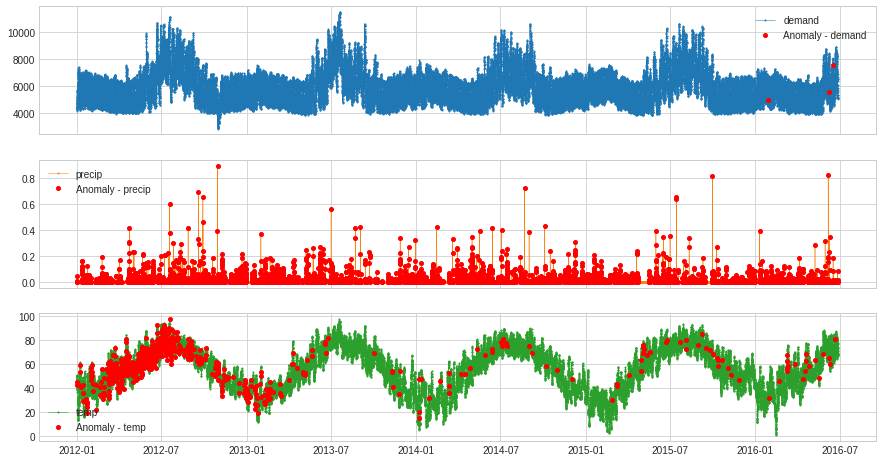

In [ ]:
!pip install adtk
from adtk.detector import *
from adtk.visualization import plot
from adtk.data import validate_series
df.set_index('timeStamp',inplace=True)
train,test = train_test_split(df,test_size=0.2,shuffle=False)
#df=validate_series(df)
seasonal_ad = SeasonalAD()
autoregression_ad=AutoregressionAD()
anomalies = autoregression_ad.fit_detect(train)
#anomalies = seasonal_ad.fit_detect(train)
plot(train, anomaly=anomalies, anomaly_color="red", anomaly_tag="marker", figsize = (15,8))

In [ ]:
fig = px.line(df, x='timeStamp', y='precip', title='NYC Precipitation',
              labels={'timeStamp':'Time',
                      'precip':'Precipitation (inches)'},
              )
fig.show()

In [ ]:
fig = px.line(df, x='timeStamp', y='temp',
              title='NYC Temperature',
              labels={'timeStamp':'Time',
                      'temp':'Temperature (in Fahrenheit)'})

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
fig = px.line(df, x='timeStamp', y='demand', title='NYC Energy Demand',
              labels={'timeStamp':'Time',
                      'demand':'Energy Demand (MWh)'})

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
ny_df=df.set_index('timeStamp')
ny_df.sort_index(inplace= True)
ny_df_daily=ny_df.resample('D').mean()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f34edb0e750>,
      dtype=object)

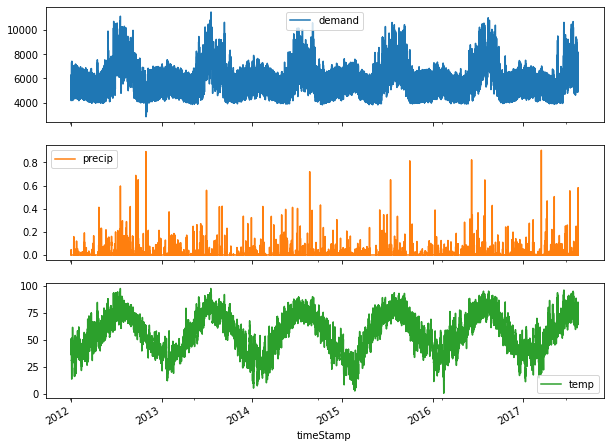

In [ ]:
ny_df.plot(subplots=True)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



<Figure size 1080x432 with 0 Axes>

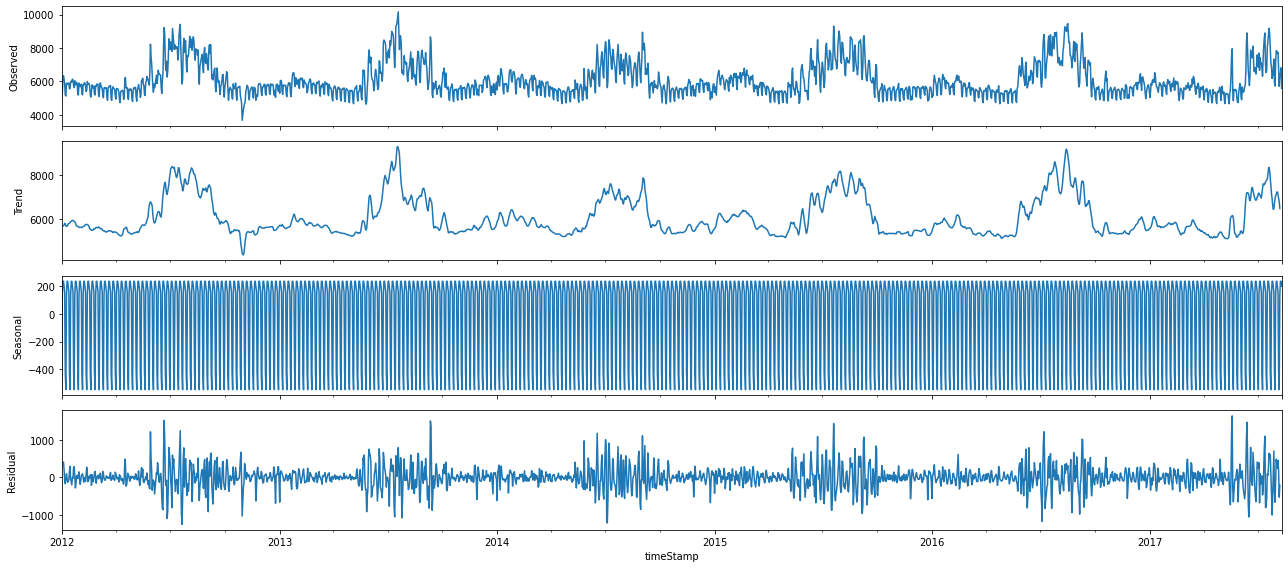

In [ ]:
plt.figure(figsize=(15, 6))
from pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(ny_df_daily.demand, model='additive' )
fig = decomposition.plot()
plt.show()

In [ ]:
df=ny_df_daily
df.rename(columns={'demand':'Target'},inplace=True)

#Length of Data
if len(df)<1000:
  length='small'
  print('This data has less than 1000 records and is limited')
else:
  length='big'
  print('This data has over 1000 records')
    
#Stationarity Test

adf = sm.tsa.stattools.adfuller(df.Target) 

if adf[1] < 0.05:
  stationary='true'
  print('Time Series is Stationary')
else:
  stationary='false'
  print('Time Series is not Stationary')

#Skewness Test
from scipy.stats import skew
if -0.5<float(skew(df.Target))<0.5:
  skewness = 'insignificant'
  print("Data is fairly symmetrical")
elif -1<float(skew(df))<0.5 or 0.5<float(skew(df))<1:
  skewness='moderate'
  print("Data is moderately skewed")
else:
  skewness = 'high'
  print("Data is highly skewed")

#Trend Test
import pymannkendall as mk
mktest=mk.seasonal_test(df.Target)
if mktest[3] < 0.05:
  trend = 'significant'
  print('Time Series displays significant trend.')
else:
  trend = 'insignificant'
  print('Time Series does not display significant trend.')

#Seasonality Test
#res = sm.tsa.ARIMA(df.Target, (1,1)).fit(disp=-1)
#res = sm.tsa.ARMA(df.Target, (1,1)).fit(disp=-1)
res = sm.tsa.ARIMA(df.Target, (2,1,2)).fit(disp=-1)
jungbox = sm.stats.acorr_ljungbox(res.resid, lags=[30])
jungbox = round(np.float(jungbox[1]))
if jungbox < 0.05:
  seasonality = 'significant'
  print('Time Series displays significant seasonality.')
else:
  seasonality = 'insignificant'
  print('Time Series does not display significant seasonality.')

#Null Values
null_values=df.Target.isnull().sum()
null_values=int(null_values)*100/len(df.Target)
if null_values<5:
  null_check = 'insignificant' 
  print('Null values are insignificant')
else:
  null_check = 'significant' 
  print('Null values are significant')

#Holidays
if df.index.weekday.all() == False:
  holidays='absent'
  print('Holidays are not present')
else:
  holidays='present'
  print('Holidays are present')

This data has over 1000 records
Time Series is Stationary


TypeError: ignored

In [ ]:
skew(df.Target)

1.2220426159021047

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9feca11cf8>,
      dtype=object)

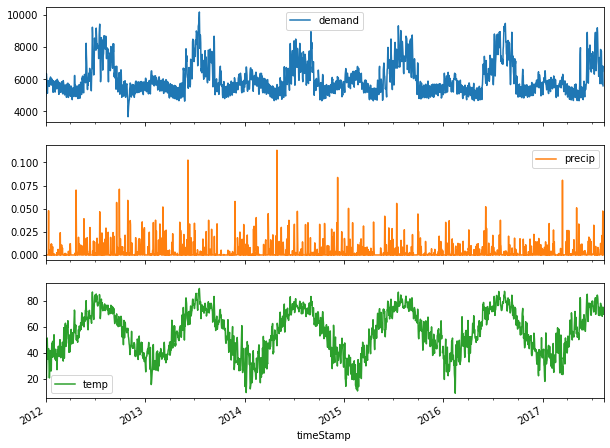

In [ ]:
ny_df.resample('D').mean().plot(subplots=True)

In [ ]:
ny_df_daily=ny_df.resample('D').mean()

In [ ]:
from fbprophet import Prophet

In [ ]:
ny_df_daily

demand    precip       temp
timeStamp                                   
2012-01-01  4954.833333  0.002487  46.510000
2012-01-02  5302.954167  0.000000  40.496667
2012-01-03  6095.512500  0.000000  26.672500
2012-01-04  6336.266667  0.000000  20.585000
2012-01-05  6130.245833  0.000000  33.577500
...                 ...       ...        ...
2017-08-06  5702.361542  0.000000  70.129167
2017-08-07  6398.154167  0.021233  68.203750
2017-08-08  6471.626042  0.000000  71.039167
2017-08-09  6811.112167  0.047529  73.852500
2017-08-10  5582.297000  0.006850  70.240000

[2049 rows x 3 columns]

In [ ]:
ny_df_final=ny_df_daily.reset_index()[['timeStamp','precip']].rename({'timeStamp':'ds','precip':'y'}, axis='columns')
train,test = train_test_split(ny_df_final,test_size=0.2,shuffle=False)
m=Prophet(interval_width=0.95)
m.fit(train)
future = m.make_future_dataframe(periods=410,freq='D')
forecast = m.predict(future)
results=pd.concat([ny_df_final.set_index('ds')['y'],forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']]],axis=1)
results['error'] = results['y'] - results['yhat']
results["uncertainty"] = results['yhat_upper'] - results['yhat_lower']
results[results['error'].abs() > 1.5*results['uncertainty']]
results['anomaly'] = results.apply(lambda x: 'Yes' if(np.abs(x['error']) >  1.5*x['uncertainty']) else 'No', axis=1)
#results=results.replace(to_replace=[results.y[results.anomaly=='Yes']], method='ffill')
results1=results[results.anomaly=='Yes']
ny_df_final.set_index('ds',inplace=True)
ny_df_final.loc[ny_df_final.index.isin(results1.index),'precip'] = results1.y

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
results1

y      yhat  yhat_lower  ...     error  uncertainty  anomaly
ds                                          ...                                
2012-04-22  0.070167  0.004447   -0.013643  ...  0.065720     0.037285      Yes
2012-09-28  0.071104  0.005416   -0.012820  ...  0.065688     0.036360      Yes
2012-10-29  0.059050  0.003878   -0.013121  ...  0.055172     0.035334      Yes
2013-06-07  0.102579  0.007264   -0.012466  ...  0.095315     0.039582      Yes
2013-11-27  0.057883  0.004140   -0.013235  ...  0.053743     0.034921      Yes
2014-04-30  0.113204  0.005506   -0.013875  ...  0.107699     0.037567      Yes
2014-12-09  0.083812  0.005491   -0.012169  ...  0.078322     0.035320      Yes
2015-07-14  0.055771  0.003843   -0.012705  ...  0.051928     0.034358      Yes
2017-03-14  0.080842  0.002041   -0.016502  ...  0.078801     0.036685      Yes

[9 rows x 7 columns]

In [ ]:
ny_df_final=ny_df_daily.reset_index()[['timeStamp','demand','temp','precip']].rename(
    {'timeStamp':'ds','demand':'y','temp':'temp','precip':'precip'}, axis='columns')
ny_df_final.set_index('ds',inplace=True)
ny_df_final.loc[ny_df_final.index.isin(results1.index),'precip'] = results1.y
ny_df_final_univariate=ny_df_final.reset_index()[['ds','y']]
train,test = train_test_split(ny_df_final_univariate,test_size=0.2,shuffle=False)
m=Prophet(interval_width=0.95)

In [ ]:
ny_df_final_univariate=ny_df_daily.reset_index()[['timeStamp','demand']].rename({'timeStamp':'ds','demand':'y'}, axis='columns')
train,test = train_test_split(ny_df_final_univariate,test_size=0.2,shuffle=False)
m=Prophet(interval_width=0.95)

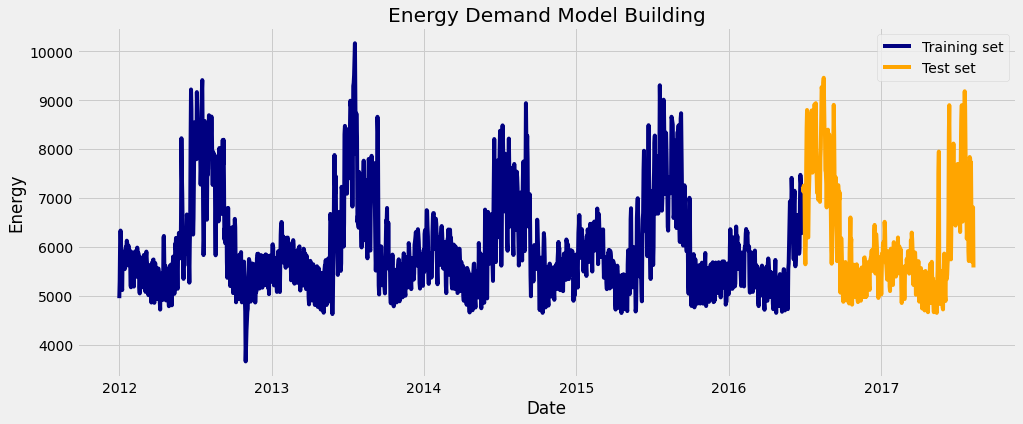

In [ ]:
plt.figure(figsize=(15, 6))
plt.style.use('fivethirtyeight')
plt.plot(train.set_index('ds')['y'],color='navy' , label='Training set')
plt.plot(test.set_index('ds')['y'],label='Test set',color='orange')
plt.xlabel('Date'); plt.ylabel('Energy'); plt.title('Energy Demand Model Building');
plt.legend();

In [ ]:
ny_df_final_univariate

ds            y
0    2012-01-01  4954.833333
1    2012-01-02  5302.954167
2    2012-01-03  6095.512500
3    2012-01-04  6336.266667
4    2012-01-05  6130.245833
...         ...          ...
2044 2017-08-06  5702.361542
2045 2017-08-07  6398.154167
2046 2017-08-08  6471.626042
2047 2017-08-09  6811.112167
2048 2017-08-10  5582.297000

[2049 rows x 2 columns]

In [ ]:
m.fit(train)
future = m.make_future_dataframe(periods=410, freq='D',include_history=False)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


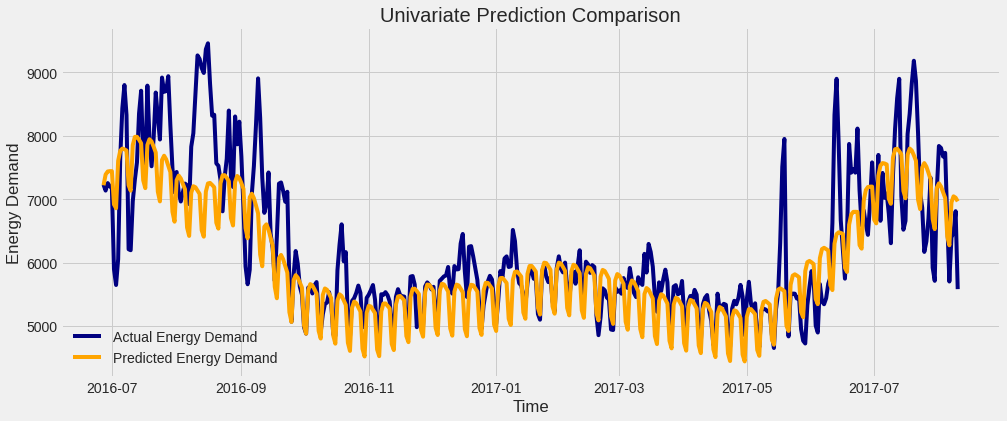

In [ ]:
plt.figure(figsize=(15, 6))
plt.style.use('fivethirtyeight')
#plt.plot(pd.concat([test.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1))
plt.plot(test.set_index('ds')['y'],label='Actual Energy Demand',color='navy')
plt.plot(forecast.set_index('ds')['yhat'],label='Predicted Energy Demand',color='orange')
plt.xlabel('Time'); plt.ylabel('Energy Demand'); plt.title('Univariate Prediction Comparison');
plt.legend();

In [ ]:
from fbprophet.diagnostics import cross_validation,  performance_metrics
cv_results = cross_validation( model = m, initial = '731 days', horizon = '180 days')
df_p = performance_metrics(cv_results)
df_p

INFO:fbprophet:Making 9 forecasts with cutoffs between 2014-01-08 00:00:00 and 2015-12-29 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

horizon            mse        rmse  ...      mape     mdape  coverage
0    18 days  290475.290489  538.957596  ...  0.072428  0.071565  0.919753
1    19 days  275445.010039  524.828553  ...  0.071286  0.071565  0.925926
2    20 days  259240.713666  509.156865  ...  0.069791  0.071485  0.932099
3    21 days  246886.403423  496.876648  ...  0.067721  0.067893  0.938272
4    22 days  244449.138168  494.417979  ...  0.066706  0.064710  0.938272
..       ...            ...         ...  ...       ...       ...       ...
158 176 days  462184.417076  679.841465  ...  0.098970  0.093113  0.827160
159 177 days  494618.698189  703.291332  ...  0.100465  0.093169  0.833333
160 178 days  518106.346224  719.796045  ...  0.100663  0.093169  0.839506
161 179 days  530055.294758  728.048965  ...  0.100869  0.091628  0.845679
162 180 days  535171.784474  731.554362  ...  0.101668  0.091628  0.845679

[163 rows x 7 columns]

In [ ]:
df_p.describe()

horizon            mse  ...       mdape    coverage
count                         163     163.000000  ...  163.000000  163.000000
mean             99 days 00:00:00  399368.558949  ...    0.075578    0.848898
std    47 days 04:45:21.352846324  133941.019385  ...    0.016236    0.074161
min              18 days 00:00:00  166053.081121  ...    0.044377    0.691358
25%              58 days 12:00:00  293832.514589  ...    0.063745    0.796296
50%              99 days 00:00:00  395049.704584  ...    0.074424    0.845679
75%             139 days 12:00:00  502266.226595  ...    0.091069    0.895062
max             180 days 00:00:00  705749.629791  ...    0.104207    0.981481

[8 rows x 7 columns]

In [ ]:
ny_df_final_univariate.y.mean()

6067.164844391677

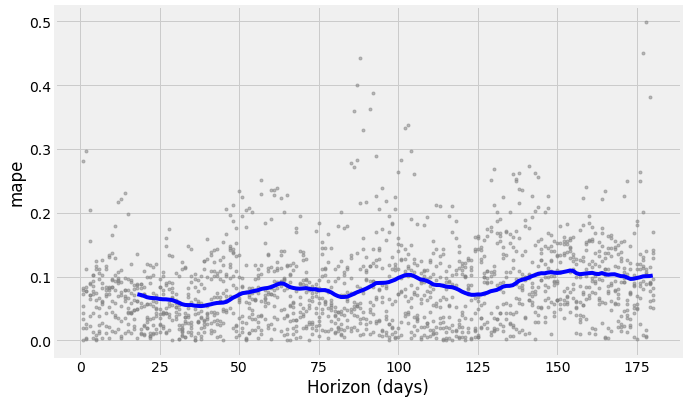

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results, metric='mape')

In [ ]:
import numpy as np
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [ ]:
ny_df_final_univariate.y.count(),forecast.yhat.count()

(2049, 2049)

In [ ]:
mean_absolute_percentage_error(ny_df_final_univariate.y,forecast.yhat)

5.235225452189747

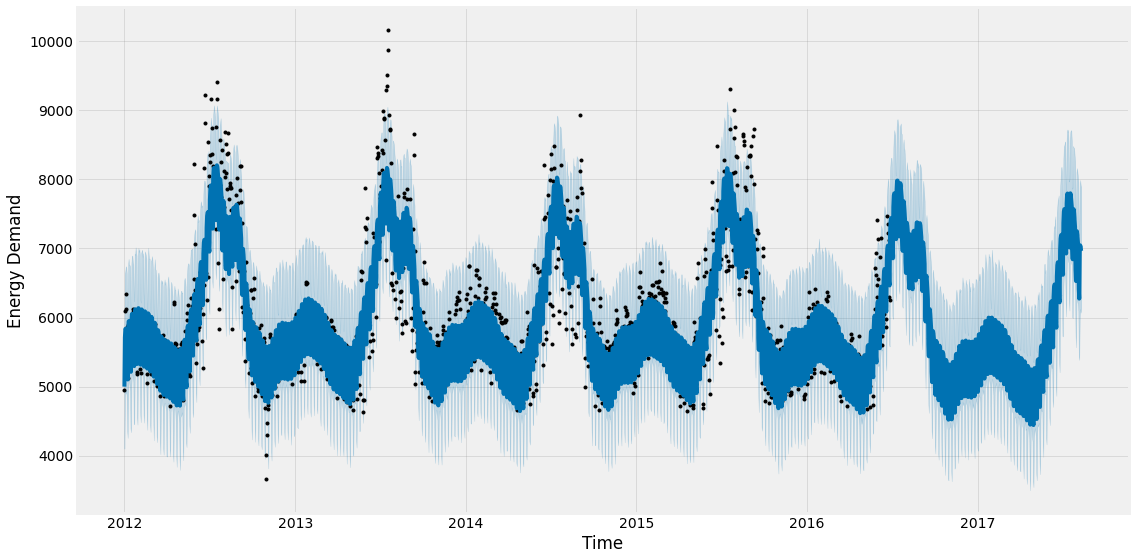

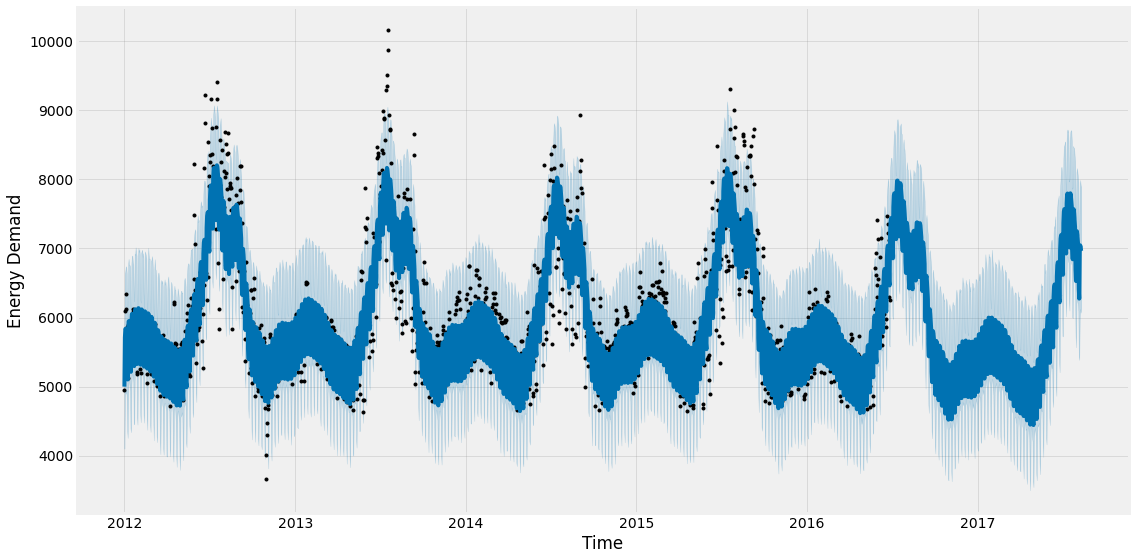

In [ ]:
from fbprophet.plot import plot

plot(m,forecast, figsize=(16, 8), 
     xlabel='Time',ylabel='Energy Demand')

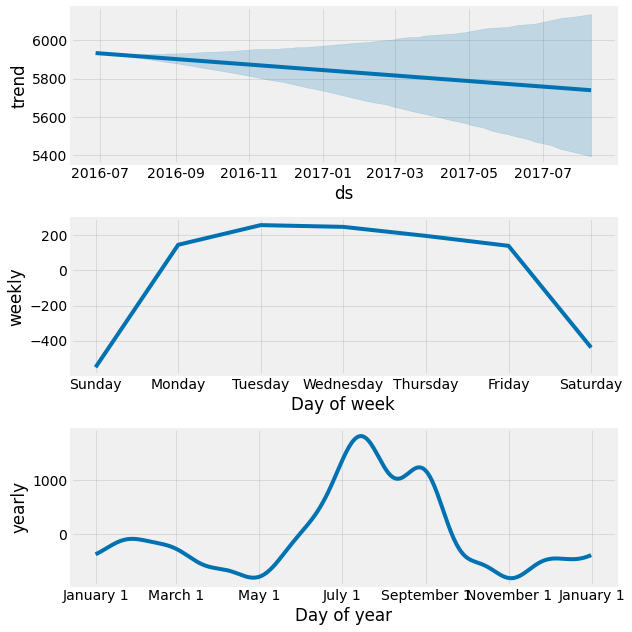

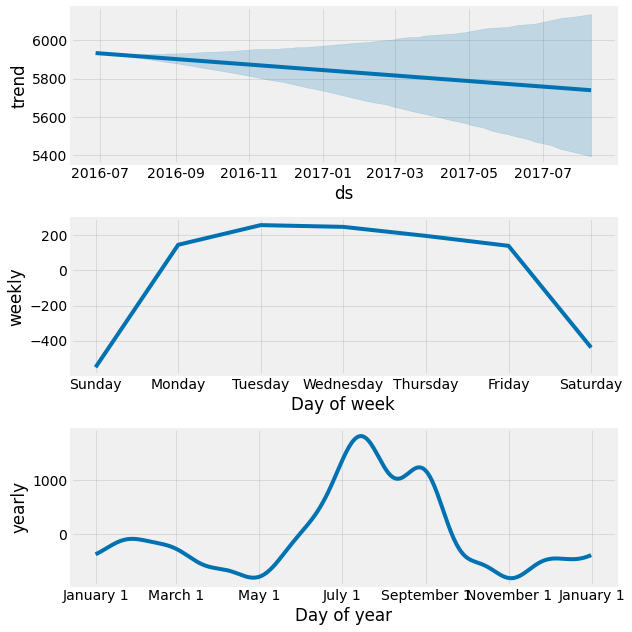

In [ ]:
m.plot_components(forecast)

Previous model fit with Univariate demand data

![alt text](http://drive.google.com/uc?export=view&id=1ucmj_y2-5SuNjIpR89Rg6vrM0j6979wB)

In [ ]:
ny_df_final=ny_df_final.reset_index()
ny_df_final['month']=ny_df_final['ds'].dt.month

In [ ]:
ny_df_final.head()

ds            y       temp    precip  month
0 2012-01-01  4954.833333  46.510000  0.002487      1
1 2012-01-02  5302.954167  40.496667  0.000000      1
2 2012-01-03  6095.512500  26.672500  0.000000      1
3 2012-01-04  6336.266667  20.585000  0.000000      1
4 2012-01-05  6130.245833  33.577500  0.000000      1

In [ ]:
fig = px.line(ny_df_final, x='ds', y='y', hover_data=['temp','month'], title='NYC Energy Demand',
              labels={'ds':'Time',
                      'y':'Energy Demand'})

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=3, label="5y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )

)
fig.show()

Text(0, 0.5, 'Temperature')

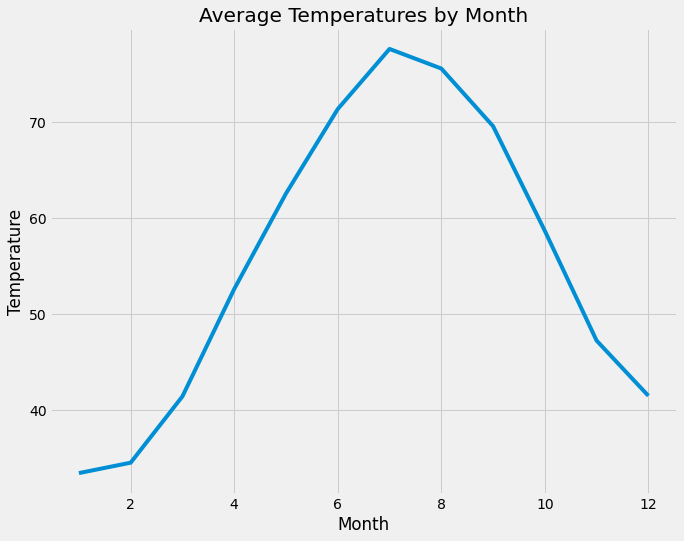

In [ ]:
plt.title('Average Temperatures by Month')
plt.plot(ny_df_final[['month','temp']].groupby('month').agg({'temp':{'mean'}}))
plt.xlabel('Month')
plt.ylabel('Temperature')

In [ ]:
ny_df_final[['y','precip']].corr()

y    precip
y       1.000000  0.033024
precip  0.033024  1.000000

In [ ]:
ny_df_final.query('temp > 80')[['y','temp']].corr()

y      temp
y     1.000000  0.552801
temp  0.552801  1.000000

In [ ]:

ny_df_final.query('temp <= 80')[['y','temp']].corr()

y      temp
y     1.000000  0.470792
temp  0.470792  1.000000

In [ ]:
def summer_temp(temp):
  if temp > 80:
    return 1
  else:
    return 0

In [ ]:
ny_df_final['summer_temp']=ny_df_final['temp'].apply(summer_temp)

In [ ]:
ny_df_final['month_bins']=pd.cut(ny_df_final['month'],bins=3, labels=False)

In [ ]:
ny_df_final

ds            y       temp  ...  month  summer_temp  month_bins
0    2012-01-01  4954.833333  46.510000  ...      1            0           0
1    2012-01-02  5302.954167  40.496667  ...      1            0           0
2    2012-01-03  6095.512500  26.672500  ...      1            0           0
3    2012-01-04  6336.266667  20.585000  ...      1            0           0
4    2012-01-05  6130.245833  33.577500  ...      1            0           0
...         ...          ...        ...  ...    ...          ...         ...
2044 2017-08-06  5702.361542  70.129167  ...      8            0           1
2045 2017-08-07  6398.154167  68.203750  ...      8            0           1
2046 2017-08-08  6471.626042  71.039167  ...      8            0           1
2047 2017-08-09  6811.112167  73.852500  ...      8            0           1
2048 2017-08-10  5582.297000  70.240000  ...      8            0           1

[2049 rows x 7 columns]

In [ ]:
train,test = train_test_split(ny_df_final,test_size=0.2,shuffle=False)

In [ ]:
m = Prophet(interval_width=0.95)

In [ ]:
m.add_regressor('summer_temp',standardize=False)
m.add_regressor('month_bins',standardize=False,mode='multiplicative')
m.add_regressor('precip',standardize='auto')

In [ ]:
m.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
#Forecasting
m = Prophet(interval_width=0.95)
m.fit(ny_df_final)
future = m.make_future_dataframe(periods=508,include_history=False)
future.tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


ds
503 2018-12-27
504 2018-12-28
505 2018-12-29
506 2018-12-30
507 2018-12-31

In [ ]:
future = m.make_future_dataframe(periods=410,include_history=False)
future.tail()

ds
405 2017-08-06
406 2017-08-07
407 2017-08-08
408 2017-08-09
409 2017-08-10

In [ ]:
future['summer_temp'] = ny_df_final['summer_temp']

In [ ]:
future['month_bins'] = ny_df_final['month_bins']
future['precip'] = ny_df_final['precip']

In [ ]:
future

ds
0   2017-08-11
1   2017-08-12
2   2017-08-13
3   2017-08-14
4   2017-08-15
..         ...
360 2018-08-06
361 2018-08-07
362 2018-08-08
363 2018-08-09
364 2018-08-10

[365 rows x 1 columns]

In [ ]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds         yhat   yhat_lower   yhat_upper
503 2018-12-27  5454.945782  4547.180485  6398.222264
504 2018-12-28  5422.018827  4430.827201  6311.237419
505 2018-12-29  4839.537723  3857.884300  5795.268611
506 2018-12-30  4720.325753  3685.789684  5703.250748
507 2018-12-31  5405.851313  4418.752180  6391.132932

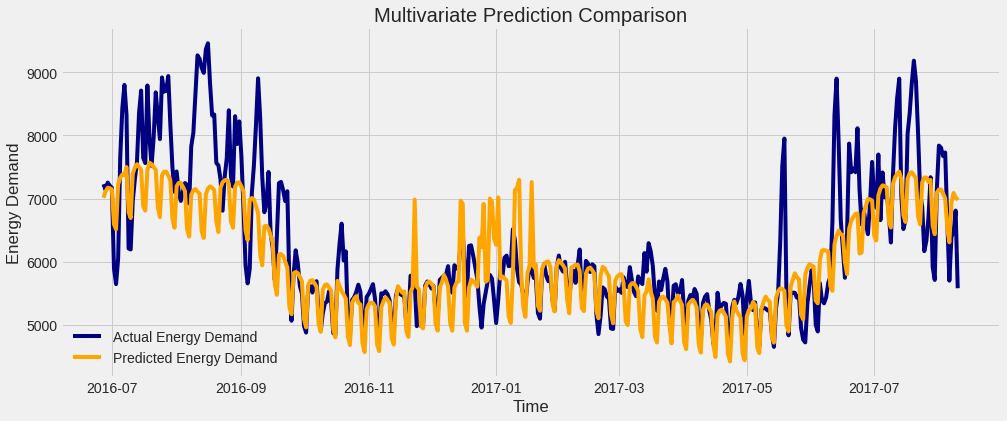

In [ ]:
plt.figure(figsize=(15, 6))
plt.style.use('fivethirtyeight')
#plt.plot(pd.concat([test.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1))
plt.plot(test.set_index('ds')['y'],label='Actual Energy Demand',color='navy')
plt.plot(forecast.set_index('ds')['yhat'],label='Predicted Energy Demand',color='orange')
plt.xlabel('Time'); plt.ylabel('Energy Demand'); plt.title('Multivariate Prediction Comparison');
plt.legend();

In [ ]:
from google.colab import files
final = pd.concat([ny_df_final.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1)
final.to_excel('NYC_Multivariate_Results.xlsx')
files.download('NYC_Multivariate_Results.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

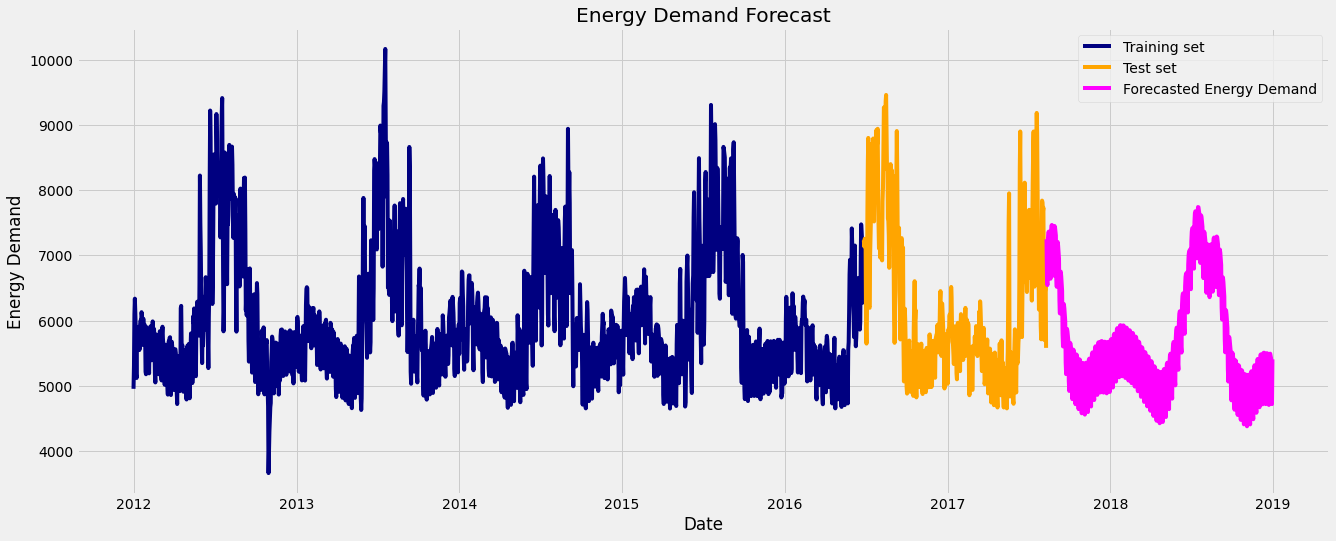

In [ ]:
plt.figure(figsize=(20, 8))
plt.style.use('fivethirtyeight')
plt.plot(train.set_index('ds')['y'],color='navy' , label='Training set')
plt.plot(test.set_index('ds')['y'],label='Test set',color='orange')
#plt.plot(ny_df_final.set_index('ds')['y'],label='Actual Energy Demand',color='navy')
plt.plot(forecast.set_index('ds')['yhat'],label='Forecasted Energy Demand',color='fuchsia')
plt.xlabel('Date'); plt.ylabel('Energy Demand'); plt.title('Energy Demand Forecast');
plt.legend(loc='upper right');

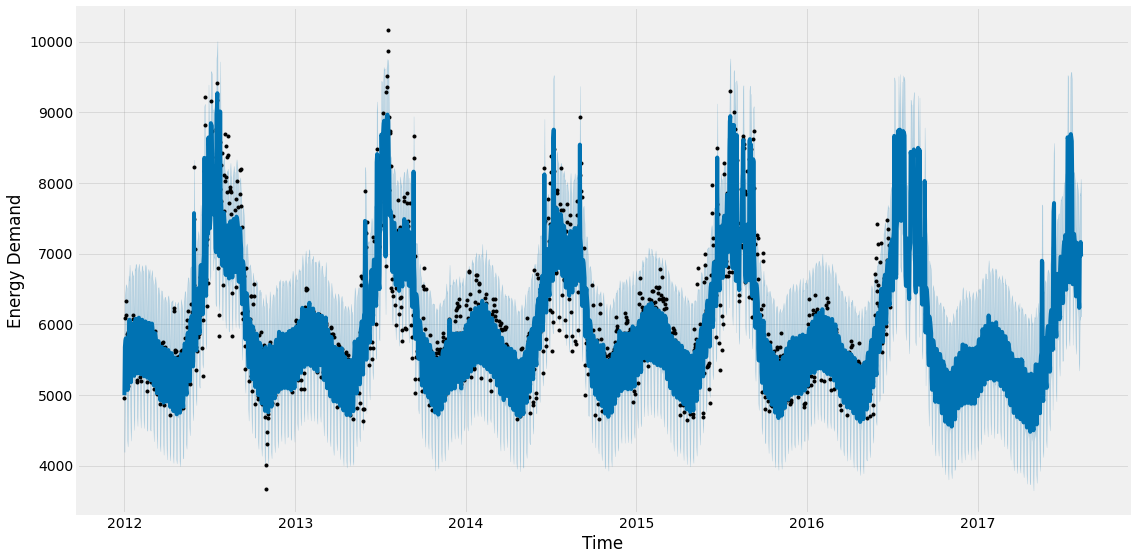

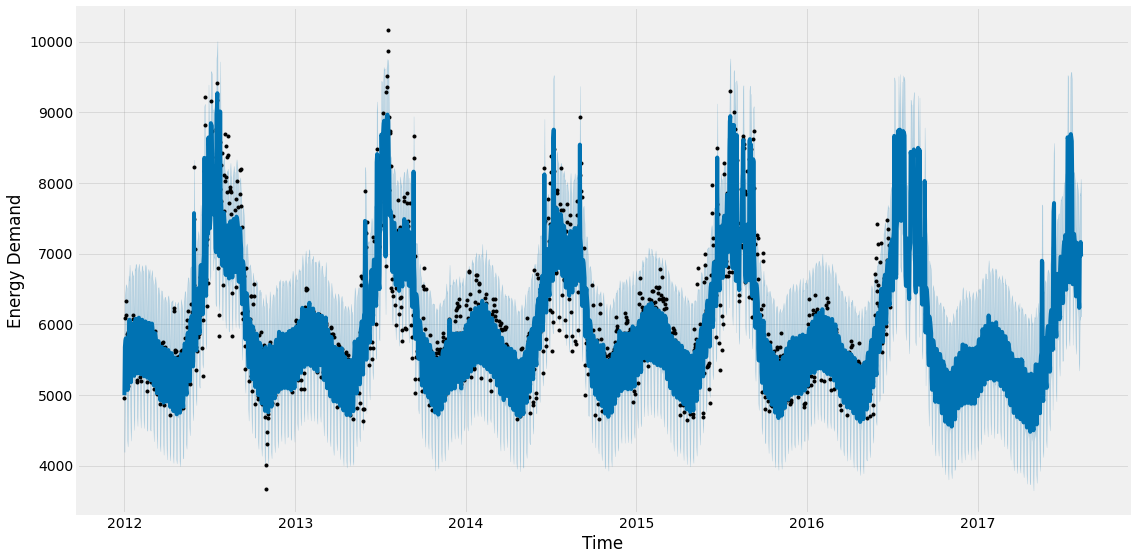

In [ ]:
  from fbprophet.plot import plot

plot(m,forecast, figsize=(16, 8), 
     xlabel='Time',ylabel='Energy Demand')

================================================================================

Previous model fit with Univariate demand data

![alt text](http://drive.google.com/uc?export=view&id=1ucmj_y2-5SuNjIpR89Rg6vrM0j6979wB)

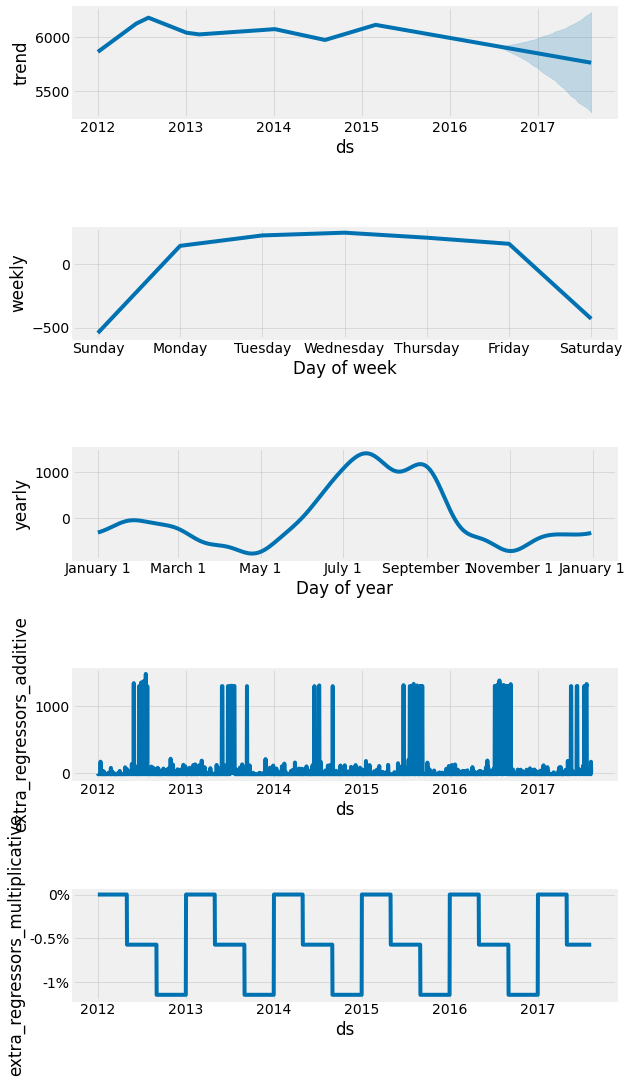

In [ ]:
fig2 = m.plot_components(forecast)

ds            y       temp  ...  month  summer_temp  month_bins
2045 2017-08-07  6398.154167  68.203750  ...      8            0           1
2046 2017-08-08  6471.626042  71.039167  ...      8            0           1
2047 2017-08-09  6811.112167  73.852500  ...      8            0           1
2048 2017-08-10  5582.297000  70.240000  ...      8            0           1

[4 rows x 7 columns]

In [ ]:
from fbprophet.diagnostics import cross_validation,  performance_metrics
cv_results = cross_validation( model = m, initial = '731 days', horizon = '180 days')
df_p = performance_metrics(cv_results)
df_p

INFO:fbprophet:Making 9 forecasts with cutoffs between 2014-01-08 00:00:00 and 2015-12-29 00:00:00


  0%|          | 0/9 [00:00<?, ?it/s]

horizon            mse        rmse  ...      mape     mdape  coverage
0    18 days  167120.331109  408.803536  ...  0.058330  0.062142  0.938272
1    19 days  158124.782780  397.649070  ...  0.057280  0.060882  0.944444
2    20 days  146147.014260  382.291792  ...  0.055560  0.056927  0.950617
3    21 days  139169.489813  373.054272  ...  0.054012  0.050361  0.956790
4    22 days  139970.742622  374.126640  ...  0.053474  0.049858  0.950617
..       ...            ...         ...  ...       ...       ...       ...
158 176 days  349870.380720  591.498420  ...  0.084040  0.077038  0.833333
159 177 days  364933.058255  604.096895  ...  0.085090  0.079778  0.833333
160 178 days  364054.751438  603.369498  ...  0.084644  0.077038  0.845679
161 179 days  358423.610738  598.684901  ...  0.083537  0.077038  0.851852
162 180 days  369413.694461  607.794122  ...  0.084112  0.077038  0.851852

[163 rows x 7 columns]

In [ ]:
df_p.describe()

horizon            mse  ...       mdape    coverage
count                         163     163.000000  ...  163.000000  163.000000
mean             99 days 00:00:00  292567.581750  ...    0.064980    0.849731
std    47 days 04:45:21.352846324  102749.313322  ...    0.012454    0.076210
min              18 days 00:00:00  121103.259030  ...    0.044103    0.666667
25%              58 days 12:00:00  228670.689257  ...    0.055553    0.814815
50%              99 days 00:00:00  276314.313990  ...    0.063044    0.851852
75%             139 days 12:00:00  367633.780624  ...    0.075804    0.901235
max             180 days 00:00:00  486969.499251  ...    0.087324    0.969136

[8 rows x 7 columns]

In [ ]:
mean_absolute_percentage_error(forecast.yhat,ny_df_final.y)

4.633466435565573

Previous MAPE - 0.06 to 0.08

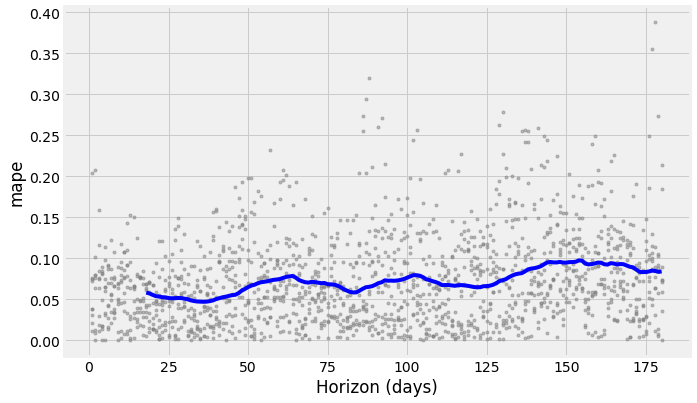

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig3 = plot_cross_validation_metric(cv_results, metric='mape')

In [ ]:
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [ ]:
df_p.rmse.describe()

count    163.000000
mean     531.869885
std       98.700420
min      347.998935
25%      478.156612
50%      525.656080
75%      606.327936
max      697.831999
Name: rmse, dtype: float64

In [ ]:
ny_df_final.y.mean()

6067.164844391677